<a href="https://colab.research.google.com/github/MEugeniaLuna/EncuestaSueldosSysarmy/blob/main/PredecirConMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDECIR CON MACHINE LEARNING**

* Aprendizaje Supervisado: tenemos un objetivo o un target, conocemos la variable que queremos predecir.

* Aprendizaje no supervisado: tenemos datos pero no tenemos objetivos/targets definidos a donde querramos llegar. Se busca ganar valor por información "escondida" en los datos.

* Aprendizaje por refuerzo: tiene en cuenta el estado del sistema donde está envuelto el algoritmo y recibe recompensa si sugiere una acción correcta o no. 





In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns # visualizacion
import plotly.express as px  #graficos
import matplotlib.pyplot as plt #graficos

In [ ]:
url = 'https://raw.githubusercontent.com/yaninaiberra/metcampDataScience2021/main/Encuentro2/Dataset/sysarmy_2020_renamed.csv'
df = pd.read_csv(url, index_col=0)
df[:3] # Es otra manera de ver las primeras filas, similar a .head()

,perfil_genero,perfil_edad,trabajo_pais,trabajo_provincia,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,perfil_carrera,perfil_universidad,perfil_cursos_especializacion,perfil_contribuciones_open_source,perfil_programa_como_hobbie,trabajo_rol,herramientas_plataforma,herramientas_languagjs_programacion,herramientas_frameworks,herramientas_data_bases,herramientas_qa_testing,herramientas_IDEs,herramientas_sistema_operativo_pc,herramientas_sistema_operativo_cel,trabajo_guardias,salario_guardias_pago,trabajo_guardias_tipo_pago,trabajo_tipo_contrato,salario_mensual_BRUTO,salario_mensual_NETO,salario_salario_dolares,salario_conformidad_sueldo,salario_comparacion_sueldo_semestre_anterior,salario_bonos,salario_bono_atado_a,salario_ajustes_inflacion_2020,salario_porcentaje_inflacion_ajuste_2020,salario_mes_ultimo_ajuste_inflacion,trabajo_violencia_laboral,perfil_orientacion_sexual,perfil_discapacidad,perfil_dificultad_ser_contratada_discapacidad,compania_cantidad_empleadxs,compania_actividad_princiapl,compania_recomendacion_lugar_trabajo,compania_politicas_inclusion,compania_beneficios_extra,compania_mejor_compania_ciudad
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# **Creación del target**

Recordemos que el TARGET es nuestra variable a predecir. En este caso vamos a CONSTRUIR nuestro propio target para poder practicar machine learning.

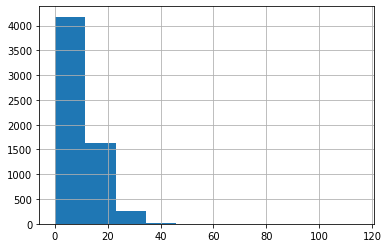

In [ ]:
#veamos como se distribuye el campo perfil_anos_experiencia
df['perfil_anos_experiencia'].hist();

Vamos a crear un problema para predecir si una persona tiene más o menos de 2 años de experiencia, según todas las otras variables

In [ ]:
#Creamos un target

#personas que tengan menos de dos años de experiencia
df.loc[df['perfil_anos_experiencia']<= 2, 'experiencia_menor2'] = 1

#personas que tengan más de dos años de experiencia
df.loc[df['perfil_anos_experiencia']> 2, 'experiencia_menor2'] = 0

In [ ]:
#para visualizar nuestra nuesva variable target
df['experiencia_menor2']

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
6090    0.0
6091    0.0
6092    1.0
6093    0.0
6094    0.0
Name: experiencia_menor2, Length: 6095, dtype: float64

Ahora vamos a suponer que nuestro dataset se constituye por todas las variables que venimos trabajando pero ahora reemplazamos perfil_anos_experiencia por experiencia_menor2.

Y nos vamos a hacer la pregunta:

# **¿Podemos predecir qué personas tienen menos de 2 años de experiencia laboral?**

Primero vamos a ver cómo se distrubuye la variable presentada como target

In [ ]:
#distribución del target
df['experiencia_menor2'].value_counts()

0.0    4936
1.0    1159
Name: experiencia_menor2, dtype: int64

## Selección de variables







<center>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSJa9pmi6qErrLgApyoFiMdi1oAqdmv-19Q9y0vGlTC358fYKzGeUckSQ2opBCPwU2NJPkm3o2YTWXgvw&usqp=CAU" height="170" />
</center>

El primer paso en cualquier problema de clasificación es:
- Pensar que variables pueden tener relación con nuestra variable a predecir. 

Es clave que hayan patrones entre nuestras variables seleccionadas y el target. Sin patrones el modelo no podrá aprender. 

In [ ]:
df.columns

Index(['perfil_genero', 'perfil_edad', 'trabajo_pais', 'trabajo_provincia',
       'perfil_anos_experiencia', 'trabajo_anios_empresa_actual',
       'trabajo_anios_puesto_actual', 'trabajo_personas_a_cargo',
       'perfil_nivel_estudios', 'perfil_estado_estudios', 'perfil_carrera',
       'perfil_universidad', 'perfil_cursos_especializacion',
       'perfil_contribuciones_open_source', 'perfil_programa_como_hobbie',
       'trabajo_rol', 'herramientas_plataforma',
       'herramientas_languagjs_programacion', 'herramientas_frameworks',
       'herramientas_data_bases', 'herramientas_qa_testing',
       'herramientas_IDEs', 'herramientas_sistema_operativo_pc',
       'herramientas_sistema_operativo_cel', 'trabajo_guardias ',
       'salario_guardias_pago', 'trabajo_guardias_tipo_pago ',
       'trabajo_tipo_contrato', 'salario_mensual_BRUTO',
       'salario_mensual_NETO', 'salario_salario_dolares',
       'salario_conformidad_sueldo',
       'salario_comparacion_sueldo_semestre_anteri

In [ ]:
df.trabajo_pais.unique()

array(['Argentina'], dtype=object)

Por ejemplo, al analizar la variable trabajo_pais, notamos que todas las instancias son iguales (Argentina), por lo tanto esta variable puede ser eliminada, ya que no represeta diferencia entre nuestro target (personas con menos de dos años de experiencia) y el resto

In [ ]:
df = df.drop('trabajo_pais',axis=1)

Eliminamos las columnas que creemos NO estarán relacionadas a nuestro target

In [ ]:
df = df.drop(['perfil_contribuciones_open_source', 'perfil_programa_como_hobbie',
       'trabajo_rol', 'herramientas_plataforma', 'perfil_cursos_especializacion',
        'herramientas_languagjs_programacion', 'herramientas_frameworks',
       'herramientas_data_bases', 'herramientas_qa_testing',
       'herramientas_IDEs', 'herramientas_sistema_operativo_pc',
       'herramientas_sistema_operativo_cel', 
       'trabajo_guardias_tipo_pago ',
       'salario_conformidad_sueldo',
       'salario_comparacion_sueldo_semestre_anterior ', 'salario_bonos',
       'salario_bono_atado_a ', 'salario_ajustes_inflacion_2020 ',
       'salario_porcentaje_inflacion_ajuste_2020',
       'salario_mes_ultimo_ajuste_inflacion ', 'trabajo_violencia_laboral',
       'perfil_orientacion_sexual', 'perfil_discapacidad',
       'perfil_dificultad_ser_contratada_discapacidad', 'perfil_carrera', 'perfil_universidad',
       'compania_cantidad_empleadxs', 'compania_actividad_princiapl',
       'compania_recomendacion_lugar_trabajo', 'compania_politicas_inclusion',
       'compania_beneficios_extra', 'compania_mejor_compania_ciudad',
       'trabajo_guardias ','salario_mensual_NETO'
      ], axis=1)

In [ ]:
#Vemos cómo quedó nuestro dataset luego de eliminar las columnas que considerantes no son relevantes
df.columns

Index(['perfil_genero', 'perfil_edad', 'trabajo_provincia',
       'perfil_anos_experiencia', 'trabajo_anios_empresa_actual',
       'trabajo_anios_puesto_actual', 'trabajo_personas_a_cargo',
       'perfil_nivel_estudios', 'perfil_estado_estudios',
       'salario_guardias_pago', 'trabajo_tipo_contrato',
       'salario_mensual_BRUTO', 'salario_salario_dolares',
       'experiencia_menor2'],
      dtype='object')

# **Preprocesar columnas**

Codificación de variables categóricas: todas nuestras variables que tenemos en categorías o string las deberíamos pasar a un número para que pueda ser interpretada por nuestro algoritmo.

**One Hot Encoding**

Para cada categoría va a crear una columna y le va a asignar un 1 si esta fila pertenece a esta categoría y un 0 sino. 

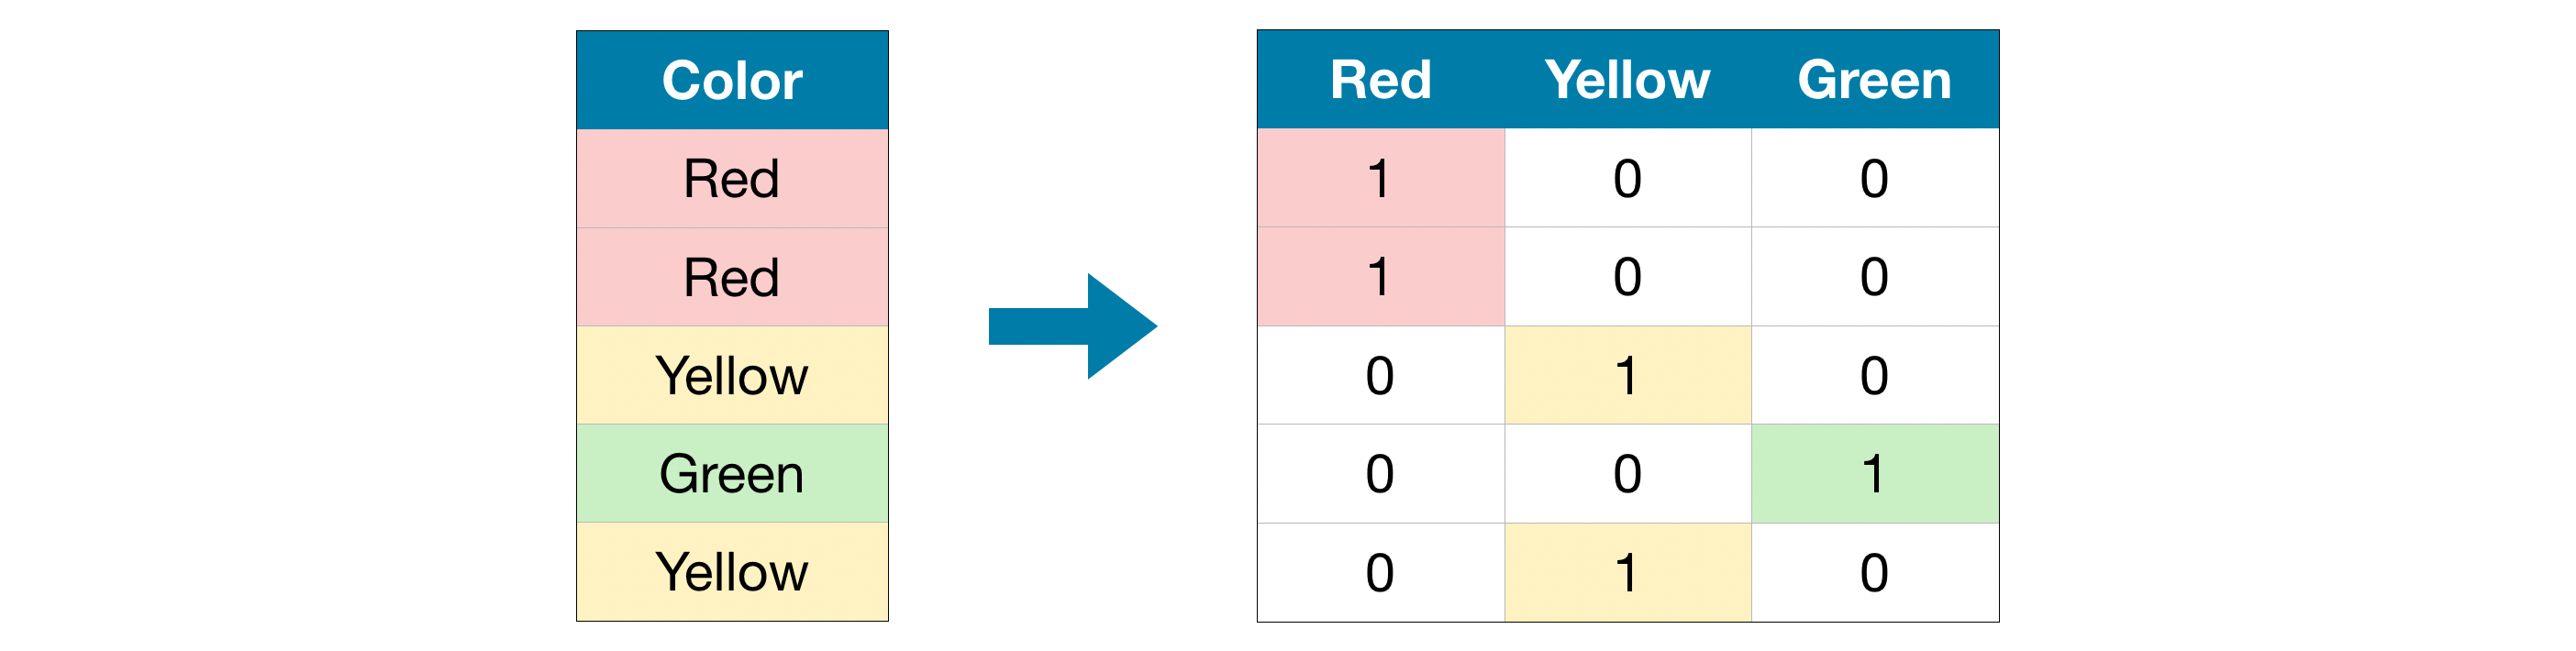

In [ ]:
#importamos sklearn, una librería muy importante para predecir
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#creamos un objeto del tipo OneHotEncoder
onehot_encoder  = OneHotEncoder()   #metodo que pasa de una columna a muchas con 0 y 1

In [ ]:
#veamos los valores unicos para la variable tipo de contrato
df['trabajo_tipo_contrato'].unique()

array(['Full-Time', 'Freelance', 'Part-Time',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Remoto (empresa de otro país)'], dtype=object)

In [ ]:
#Usamos el método fit_transform para codificar la columna trabajo_tipo_contrato del dataset
tipo_trabajo_codigo = onehot_encoder.fit_transform(df[['trabajo_tipo_contrato']]).toarray() #toarray es para que lo muestre como matriz

In [ ]:
onehot_encoder.fit_transform(df[['trabajo_tipo_contrato']]).toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
tipo_contrato_codigo = pd.DataFrame(tipo_trabajo_codigo, columns=onehot_encoder.categories_[0]) #introducimos la matriz en el dataset

In [ ]:
tipo_contrato_codigo.head()

,Freelance,Full-Time,Part-Time,Remoto (empresa de otro país),Tercerizado (trabajo a través de consultora o agencia)
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0


In [ ]:
#Pegamos los datos codificados al dataset original
df = df.join(tipo_contrato_codigo)

In [ ]:
#Eliminamos la columna original de tipo de contrato
df =df.drop(['trabajo_tipo_contrato'], axis=1)

In [ ]:
df.head()

,perfil_genero,perfil_edad,trabajo_provincia,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,salario_guardias_pago,salario_mensual_BRUTO,salario_salario_dolares,experiencia_menor2,Freelance,Full-Time,Part-Time,Remoto (empresa de otro país),Tercerizado (trabajo a través de consultora o agencia)
0,Mujer,26,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,0.0,53000.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0
1,Hombre,29,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,0.0,79000.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0
2,Mujer,22,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,0.0,160000.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0
3,Hombre,39,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,0.0,130000.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0
4,Hombre,32,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,0.0,140000.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0


**Columna: Salario Dolares**


También puede haber columnas donde esté "implícito" que requieren una codificación como:

In [ ]:
df.salario_salario_dolares.unique() 

array([nan, 'Mi sueldo está dolarizado'], dtype=object)

Vemos que tenemos dos valores: nulos (no tiene salario en USD) y mi sueldo esta dolarizado. 
Asumimos que los nulos son salarios que se cobran en pesos.
Vamos a reemplazar los nulos por 0 y los sueldos dolarizados por 1

In [ ]:
df['salario_salario_dolares'] = df.salario_salario_dolares.replace('Mi sueldo está dolarizado', 1)


In [ ]:
df.salario_salario_dolares.fillna(0, inplace=True)

In [ ]:
#Trasformamos el tipo de datos a numéricos, ya que era string y no va tomar los valores como válidos
df['salario_salario_dolares']=df['salario_salario_dolares'].astype(int)

In [ ]:
df.salario_salario_dolares.value_counts()

0    5419
1     676
Name: salario_salario_dolares, dtype: int64


# **Ordinal Encoding**

Genera una unica columna con la asignación para cada valor. 
Puede dar la impresión de que green en mayor que yellow, pero en realidad no corresponderia, por eso se usa el método Hot Encoding.
Se puede usar en caso de que sean categorías ordinales

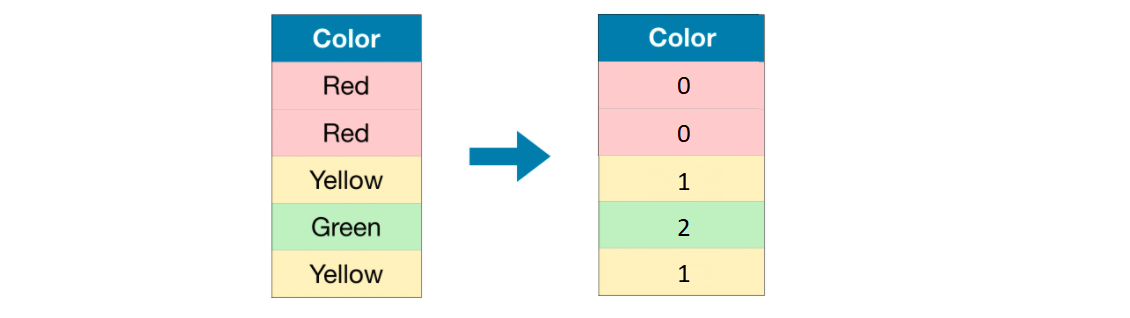


In [ ]:
#Importamos la librería
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
#Creamos el objeto del tipo LabelEncoder
ordinal_encoder = OrdinalEncoder()

In [ ]:
#Usamos el método fit_transform para codificar la columna perfil_genero del data set
ordinal_encoder.fit_transform(df[['perfil_genero']])

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
#Pegamos los datos codificados al dataset original, de esta manera al nombrar una columna que no existe en el df, lo agrega automáticamente, evitamos hacer el join
df['perfil_genero_codigo']= ordinal_encoder.fit_transform(df[['perfil_genero']])

In [ ]:
#Eliminamos la columna perfil_genero original
df = df.drop(['perfil_genero'], axis=1)

In [ ]:
df.head()

,perfil_edad,trabajo_provincia,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,salario_guardias_pago,salario_mensual_BRUTO,salario_salario_dolares,experiencia_menor2,Freelance,Full-Time,Part-Time,Remoto (empresa de otro país),Tercerizado (trabajo a través de consultora o agencia),perfil_genero_codigo
0,26,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,0.0,53000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,29,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,0.0,79000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,22,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,0.0,160000.0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,39,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,0.0,130000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,32,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,0.0,140000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


También existen columnas que si bien aplicaría un LabelEncoder como el nivel de estudios y el estado de los estudios. Como la compu no puede saber cual es el orden correcto (lo hace alfabéticamente) lo haremos de forma manual con la función MAP

# **Función map**

<img src="https://swiftunboxed.com/images/map.png" height="250" />






In [ ]:
df['perfil_nivel_estudios'].unique()

array(['Universitario', 'Secundario', 'Posgrado', 'Terciario',
       'Doctorado', 'Posdoctorado', 'Primario'], dtype=object)

In [ ]:
#Vamos a pasarle manualmente el orden, a través de un diccionario
df['perfil_nivel_estudios'] = df['perfil_nivel_estudios'].map({'Primario':1 , 
                                                               'Secundario':2,
                                                               'Terciario' :3,
                                                               'Universitario':4,                                                          
                                                               'Posgrado' : 5,
                                                               'Doctorado' : 6,
                                                               'Posdoctorado' : 6
                                                               })

In [ ]:
df.head()

,perfil_edad,trabajo_provincia,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,salario_guardias_pago,salario_mensual_BRUTO,salario_salario_dolares,experiencia_menor2,Freelance,Full-Time,Part-Time,Remoto (empresa de otro país),Tercerizado (trabajo a través de consultora o agencia),perfil_genero_codigo
0,26,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,4,En curso,0.0,53000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,29,Corrientes,5.0,2.0,2.0,4,4,En curso,0.0,79000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,22,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,2,Completado,0.0,160000.0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,39,Corrientes,15.0,15.0,13.0,5,5,Incompleto,0.0,130000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,32,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,4,En curso,0.0,140000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Hagamos lo mismo con la variable perfil_estado_estudios

In [ ]:
df['perfil_estado_estudios'].unique()

array(['En curso', 'Completado', 'Incompleto'], dtype=object)

In [ ]:
df['perfil_estado_estudios'] = df['perfil_estado_estudios'].map({'Incompleto':0, 
                                                               'En curso':1,
                                                               'Completado' :2
                                                               })

In [ ]:
df.head()

,perfil_edad,trabajo_provincia,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,salario_guardias_pago,salario_mensual_BRUTO,salario_salario_dolares,experiencia_menor2,Freelance,Full-Time,Part-Time,Remoto (empresa de otro país),Tercerizado (trabajo a través de consultora o agencia),perfil_genero_codigo
0,26,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,4,1,0.0,53000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,29,Corrientes,5.0,2.0,2.0,4,4,1,0.0,79000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,22,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,2,2,0.0,160000.0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,39,Corrientes,15.0,15.0,13.0,5,5,0,0.0,130000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,32,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,4,1,0.0,140000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


También cabe considerar que no todas las columnas deben ser codificadas. Por ejemplo:

Esta columna aunque tiene info tal vez relevante agregaría demasiadas dimensiones a nuestro dataset de pocas filas... La relación entre # columnas y # filas es clave


In [ ]:
df['trabajo_provincia'].unique()

array(['Ciudad Autónoma de Buenos Aires', 'Corrientes',
       'Provincia de Buenos Aires', 'Entre Ríos', 'Córdoba', 'Tucumán',
       'GBA', 'Santa Fe', 'Neuquén', 'Mendoza', 'Misiones', 'Chaco',
       'Chubut', 'Jujuy', 'La Rioja', 'Río Negro', 'Salta',
       'Tierra del Fuego', 'San Luis', 'Catamarca', 'San Juan',
       'Santiago del Estero', 'La Pampa', 'Formosa', 'Santa Cruz'],
      dtype=object)

In [ ]:
df.drop(['trabajo_provincia'],
        axis=1, inplace=True )

In [ ]:
df.columns

Index(['perfil_edad', 'perfil_anos_experiencia',
       'trabajo_anios_empresa_actual', 'trabajo_anios_puesto_actual',
       'trabajo_personas_a_cargo', 'perfil_nivel_estudios',
       'perfil_estado_estudios', 'salario_guardias_pago',
       'salario_mensual_BRUTO', 'salario_salario_dolares',
       'experiencia_menor2', 'Freelance', 'Full-Time', 'Part-Time',
       'Remoto (empresa de otro país)',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'perfil_genero_codigo'],
      dtype='object')

### Otras transformaciones

Objetivo: Crear nuevas variables adaptadas al negocio concreto y que aporten  valor  para su inclusión en los modelos que desarrollaremos posteriormente. Estas nuevas variables (columnas) surgen de operaciones aplicadas a los datos que ya poseemos.


- Proporcion de tiempo trabajando en el puesto actual sobre la cantidad de años trabajando en la empresa 
(trabajo_anios_puesto_actual/trabajo_anios_empresa_actual)


In [ ]:
df['proporcion_puesto_actual']= df['trabajo_anios_puesto_actual'] / (df['trabajo_anios_empresa_actual'])

¿Qué pasó con la división por 0?

In [ ]:
df[df.trabajo_anios_empresa_actual==0].head() #vemos valores nulos para los casos en los que las personas tengan 0 años en la empresa actual

,perfil_edad,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,salario_guardias_pago,salario_mensual_BRUTO,salario_salario_dolares,experiencia_menor2,Freelance,Full-Time,Part-Time,Remoto (empresa de otro país),Tercerizado (trabajo a través de consultora o agencia),perfil_genero_codigo,proporcion_puesto_actual
2,22,2.0,0.0,0.0,0,2,2,0.0,160000.0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
5,25,1.0,0.0,0.0,0,3,0,0.0,54000.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
7,23,0.0,0.0,0.0,0,3,1,0.0,45000.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
10,25,1.0,0.0,0.0,0,3,1,0.0,36800.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
14,42,10.0,0.0,0.0,3,4,0,0.0,102000.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN


Para evitar dicho error, podemos filtrar nuestro dataset antes de hacer el cálculo


In [ ]:
df.loc[df['trabajo_anios_empresa_actual']>0, 'proporcion_puesto_actual']=  df['trabajo_anios_puesto_actual'] / (df['trabajo_anios_empresa_actual'])
df.loc[df['trabajo_anios_empresa_actual']==0, 'proporcion_puesto_actual']= 1

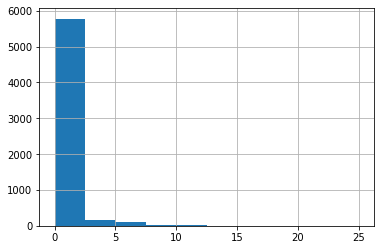

In [ ]:
df['proporcion_puesto_actual'].hist(bins=10);


- Porcentaje de precio de guardias sobre el salario bruto

In [ ]:
df['proporcion_precio_guardia']= df['salario_guardias_pago'] / (df['salario_mensual_BRUTO'])

In [ ]:
df['proporcion_precio_guardia'].describe()

count    6095.000000
mean        0.018440
std         0.634327
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        44.444444
Name: proporcion_precio_guardia, dtype: float64

## Variables contra el target

Un paso clave en todo proyecto de aprendizaje supervisado, es no solo la visualización en el framework del EDA si no también para ver la relación de nuestras variables contra nuestro TARGET.
De nuevo: sin patrones el modelo no va a tener que aprender. 

In [ ]:
df.columns


Index(['perfil_edad', 'perfil_anos_experiencia',
       'trabajo_anios_empresa_actual', 'trabajo_anios_puesto_actual',
       'trabajo_personas_a_cargo', 'perfil_nivel_estudios',
       'perfil_estado_estudios', 'salario_guardias_pago',
       'salario_mensual_BRUTO', 'salario_salario_dolares',
       'experiencia_menor2', 'Freelance', 'Full-Time', 'Part-Time',
       'Remoto (empresa de otro país)',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'perfil_genero_codigo', 'proporcion_puesto_actual',
       'proporcion_precio_guardia'],
      dtype='object')

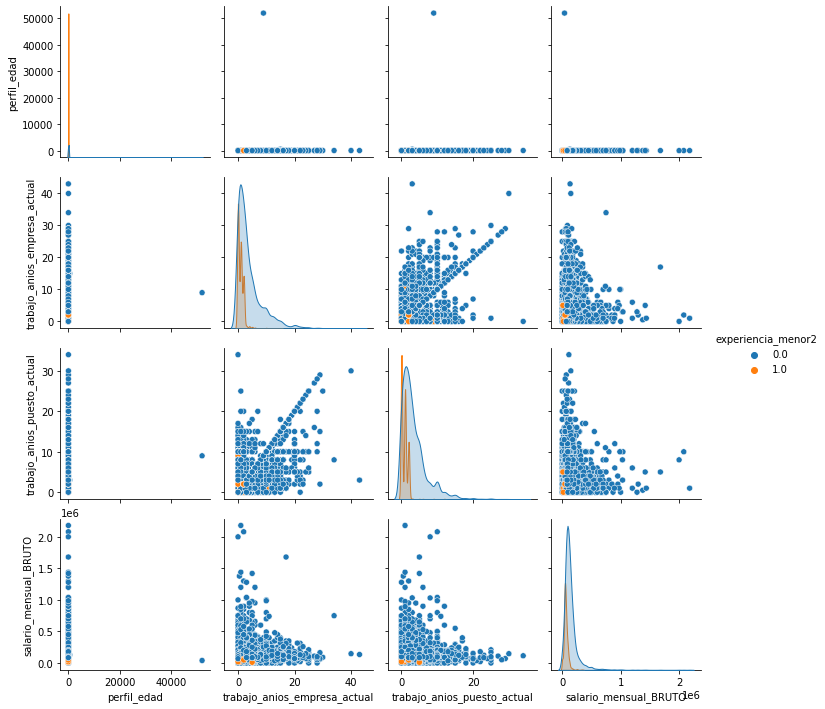

In [ ]:
sns.pairplot(df[['perfil_edad', 'trabajo_anios_empresa_actual', 'trabajo_anios_puesto_actual',
       #'trabajo_personas_a_cargo', 'salario_guardias_pago', 
       'salario_mensual_BRUTO', #'salario_mensual_NETO',
       'experiencia_menor2']],
      hue = 'experiencia_menor2')  
#pairplot es un grafico con sintaxis simples, llamamos las variables que nos interesan analizar y nuestro target
#pone todas las variables en el eje de las x y despues en el eje de las y va graficando los pares.
      #hue subdivide nuestra variable por nuestro target

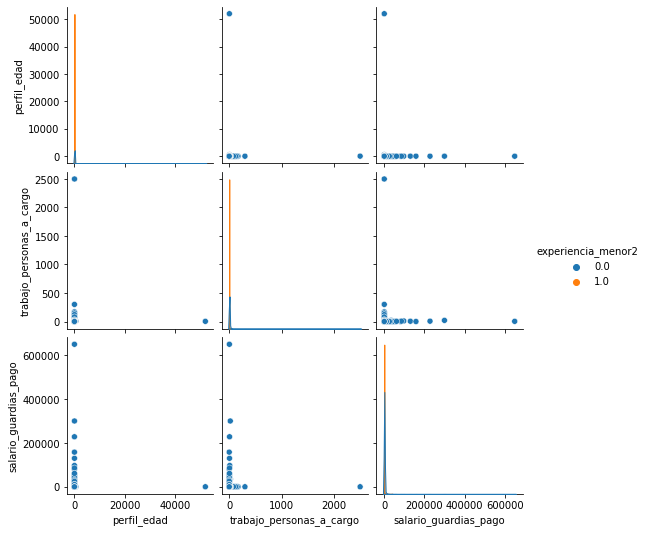

In [ ]:
sns.pairplot(df[['perfil_edad', #'trabajo_anios_empresa_actual', #'trabajo_anios_puesto_actual',
       'trabajo_personas_a_cargo', 'salario_guardias_pago', 
       #'salario_mensual_BRUTO', 'salario_mensual_NETO',
       'experiencia_menor2']],
      hue = 'experiencia_menor2')  

## Modelo de clasificación


*En los problemas de clasificación, la variable que queremos predecir es una clase discreta.*
No reciben variables categoricas. Siempre que sean binarios es mejor

In [ ]:
df.isna().sum() #isna nos muestra si es true o false (que no tenga nulos)

perfil_edad                                               0
perfil_anos_experiencia                                   0
trabajo_anios_empresa_actual                              0
trabajo_anios_puesto_actual                               0
trabajo_personas_a_cargo                                  0
perfil_nivel_estudios                                     0
perfil_estado_estudios                                    0
salario_guardias_pago                                     0
salario_mensual_BRUTO                                     0
salario_salario_dolares                                   0
experiencia_menor2                                        0
Freelance                                                 0
Full-Time                                                 0
Part-Time                                                 0
Remoto (empresa de otro país)                             0
Tercerizado (trabajo a través de consultora o agencia)    0
perfil_genero_codigo                    

In [ ]:
df.shape

(6095, 19)

In [ ]:
df.dtypes

perfil_edad                                                 int64
perfil_anos_experiencia                                   float64
trabajo_anios_empresa_actual                              float64
trabajo_anios_puesto_actual                               float64
trabajo_personas_a_cargo                                    int64
perfil_nivel_estudios                                       int64
perfil_estado_estudios                                      int64
salario_guardias_pago                                     float64
salario_mensual_BRUTO                                     float64
salario_salario_dolares                                     int64
experiencia_menor2                                        float64
Freelance                                                 float64
Full-Time                                                 float64
Part-Time                                                 float64
Remoto (empresa de otro país)                             float64
Tercerizad

1.  Definir las variables de entradas para el modelo y La columna target.
Dividir el data set entre x e y. Y es la variable a predecir  y x es una matriz,  son todas las variables que van a ayudar a predecir la Y. 
X siempre se usa en mayúscula porque es una matriz e y se usa en minúscula porque es un vector (una sola columna)


In [ ]:
X = df.drop(['perfil_anos_experiencia', 'experiencia_menor2'],axis=1)  #eliminas esas columnas para que el modelo pueda predecir
y = df['experiencia_menor2']  #Y es el target

2. Dividir en set de entrenamiento y set de prueba

Divido el data set en dos, una parte para entrenar el modelo (para que encuentre las relaciones entre las variables que tenemos y la que queremos predecir) y otro para testear el modelo (se pasa otro data set sin mi target, para que veamos si funciona y arroja el resultado correcto).
Si da mal, tiene que volver a entrenar con otras variables y volver a testear.

<center>
<img src="https://www.dataquest.io/wp-content/uploads/kaggle_overview.svg" height="400" />

<center>
<img src="https://www.dataquest.io/wp-content/uploads/kaggle_train_test_split.svg" height="300" />


In [ ]:
from sklearn.model_selection import train_test_split  #para dividir el data set, usamos la funcion train_test_split de la librería sklearn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=311) 
#test_size que tamaño quiero que tenga para testear.
#random_state es para seleccionar aleatoriamente las filas a testear
#se usa 70% para entrenar y 30% para testear generalmente)

In [ ]:
print('Dimensiones del set de entrenamiento', X_train.shape)
print('Dimensiones del set de testing', X_test.shape)

Dimensiones del set de entrenamiento (4876, 17)
Dimensiones del set de testing (1219, 17)


3. Crear un objeto que tenga el tipo de modelo que queremos entrenar



 https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

In [ ]:
from sklearn import tree #importamos el arbol de la libreria sklearn
clf = tree.DecisionTreeClassifier(max_leaf_nodes=10, random_state=0) #modelo de arbol de decision

4. Entrenar el modelo

In [ ]:
clf

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [ ]:
clf = clf.fit(X_train, y_train) #.fit para entrenar el modelo, lo entreno con mi Xtrain y mi ytraine. 
#Encontra los patrones que diferencia a las personas con mas y menos de 2 años de experiencia

5. Predecir

In [ ]:
pred_y = clf.predict(X_test)  #.predict le paso todo sin el target, para que el modelo haga la prediccion

In [ ]:
pred_y #la primera persona tiene menos de 2 años, la segunda tmb, la tercera tiene mas. y asi

array([0., 0., 1., ..., 0., 1., 0.])

In [ ]:
print('Real      : ', y_test[:5].values) #esto es valuacion de modelo, para ver si el modelo aprendio bien o tengo que reentrenarlo
print('Prediccion: ', pred_y[:5])

Real      :  [0. 0. 1. 0. 0.]
Prediccion:  [0. 0. 1. 0. 0.]


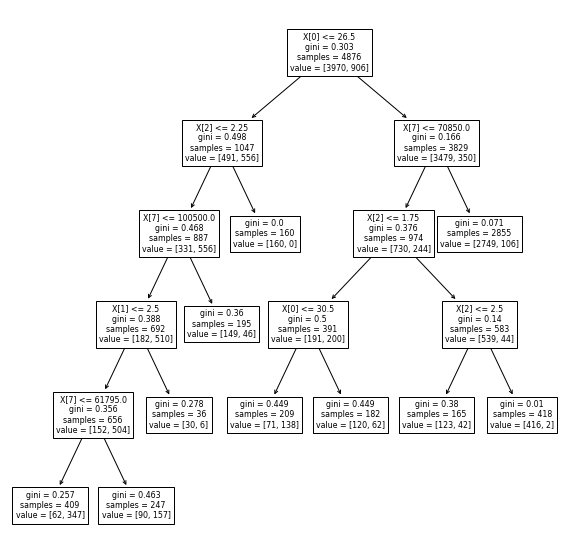

In [ ]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf) #clf es mi algoritmo, le pido que lo grafique
plt.show()

# **Modelo de Regresion**

En los problemas de regresión, la variable que queremos predecir (target) es un número continuo. Vamos a tratar de predecir cúantos años tiene de experiencia

1. Definir entradas para el modelo y la columna target

In [ ]:
y = df['perfil_anos_experiencia']
X = df.drop(['perfil_anos_experiencia','experiencia_menor2'], axis=1)

2. Dividir en set de entrenamiento y set de prueba

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=311)

In [ ]:
print('Dimensiones del set de entrenamiento', X_train.shape)
print('Dimensiones del set de testing', X_test.shape)

Dimensiones del set de entrenamiento (4876, 17)
Dimensiones del set de testing (1219, 17)


3. Crear un objeto que tenga el tipo de modelo que queremos entrenar

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

4. Entrenar el modelo

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

5. Predecir

In [ ]:
y_pred= regressor.predict(X_test)

In [ ]:
print('Real      : ', y_test[:5].values)
print('Prediccion: ', y_pred[:5])

Real      :  [ 6. 10.  1. 19.  5.]
Prediccion:  [ 6.55623781  9.60359908  1.99498855 18.89350238  9.2019207 ]


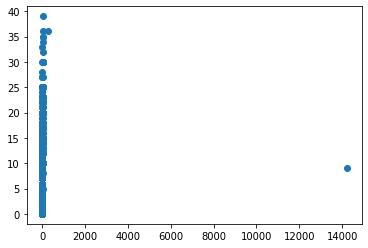

In [ ]:
plt.scatter(x=y_pred, 
           y=y_test);